In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

from gym_reachability import gym_reachability  # Custom Gym env.
import gym
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import torch
from collections import namedtuple

from KC_DQN.DDQN import DDQN
from KC_DQN.config import dqnConfig

In [2]:
#== CONFIGURATION ==
toEnd = True
env_name = "zermelo_show-v0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
maxAccess = 3e6
maxSteps = 200
thin = False
hard = False
if thin:
    thickness = .1
    name_thickness = 'thin'
else:
    thickness = 1.
    name_thickness = 'thick'
if hard:
    modelsFolder='show/hard/RA/{:s}'.format(name_thickness)
    figureFolder='figure/show/hard/RA/{:s}'.format(name_thickness)
else:
    modelsFolder='show/RA/{:s}'.format(name_thickness)
    figureFolder='figure/show/RA/{:s}'.format(name_thickness)
os.makedirs(figureFolder, exist_ok=True)

if toEnd:
    maxEpisodes = int(maxAccess / maxSteps)
else:
    maxEpisodes = 60000
update_period = int(maxEpisodes / 10)
update_period_half = int(update_period/2)

CONFIG = dqnConfig(DEVICE=device, ENV_NAME=env_name, 
                   MAX_EPISODES=maxEpisodes, MAX_EP_STEPS=maxSteps,
                   BATCH_SIZE=100, MEMORY_CAPACITY=10000,
                   GAMMA=.999, GAMMA_PERIOD=2000,
                   EPS_PERIOD=1000, EPS_DECAY=0.6,
                   LR_C=1e-3, LR_C_PERIOD=2000, LR_C_DECAY=0.8)

In [3]:
# == Environment ==
if toEnd:
    env = gym.make(env_name, device=device, mode='RA', doneType='toEnd', thickness=thickness, hard=hard)
else:
    env = gym.make(env_name, device=device, mode='RA', thickness=thickness)
env.set_costParam(scaling=1.)

s_dim = env.observation_space.shape[0]
action_num = env.action_space.n
action_list = np.arange(action_num)
print(env.spec.id)
print(s_dim, action_num)

Env: mode---RA; doneType---toEnd
zermelo_show-v0
2 3


In [4]:
#== AGENT ==
agent=DDQN(s_dim, action_num, CONFIG, action_list, mode='RA', RA_scaling=1.)
agent.restore('models/store_best/naive/RA/{:s}/model-{:d}.pth'.format(name_thickness, 500000))

=> Restore models/store_best/naive/RA/thick/model-500000.pth


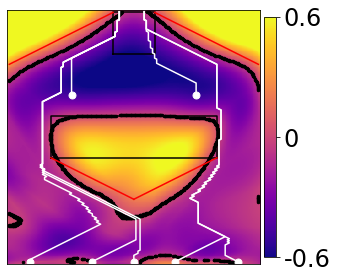

In [5]:
v = env.visualize_analytic_comparison(agent.Q_network, True, vmin=-.6, vmax=.6, nx=301, ny=301, labels=None, plotZero=True)
env.plot_reach_avoid_set()
env.plot_trajectories(agent.Q_network, T=200, states=env.visual_initial_states, toEnd=True)
#env.plot_trajectories(agent.Q_network, T=200, num_rnd_traj=100, toEnd=True, keepOutOf=True)
plt.tight_layout()
plt.savefig('figure/show/RA/{:s}/RA_{:s}.eps'.format(name_thickness, name_thickness))

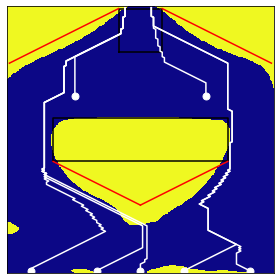

In [6]:
env.visualize_analytic_comparison(agent.Q_network, True, vmin=0, boolPlot=True, nx=301, ny=301, labels=None)
env.plot_reach_avoid_set()
env.plot_trajectories(agent.Q_network, T=200, states=env.visual_initial_states, toEnd=True)
plt.tight_layout()
plt.savefig('figure/show/RA/{:s}/RA_{:s}_bool.eps'.format(name_thickness, name_thickness))

## THIN

In [7]:
#== CONFIGURATION ==
toEnd = True
env_name = "zermelo_show-v0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
maxAccess = 3e6
maxSteps = 200
thin = True
hard = False
if thin:
    thickness = .1
    name_thickness = 'thin'
else:
    thickness = 1.
    name_thickness = 'thick'
if hard:
    modelsFolder='show/hard/RA/{:s}'.format(name_thickness)
    figureFolder='figure/show/hard/RA/{:s}'.format(name_thickness)
else:
    modelsFolder='show/RA/{:s}'.format(name_thickness)
    figureFolder='figure/show/RA/{:s}'.format(name_thickness)
os.makedirs(figureFolder, exist_ok=True)

if toEnd:
    maxEpisodes = int(maxAccess / maxSteps)
else:
    maxEpisodes = 60000
update_period = int(maxEpisodes / 10)
update_period_half = int(update_period/2)

CONFIG = dqnConfig(DEVICE=device, ENV_NAME=env_name, 
                   MAX_EPISODES=maxEpisodes, MAX_EP_STEPS=maxSteps,
                   BATCH_SIZE=100, MEMORY_CAPACITY=10000,
                   GAMMA=.999, GAMMA_PERIOD=2000,
                   EPS_PERIOD=1000, EPS_DECAY=0.6,
                   LR_C=1e-3, LR_C_PERIOD=2000, LR_C_DECAY=0.8)

In [8]:
# == Environment ==
if toEnd:
    env = gym.make(env_name, device=device, mode='RA', doneType='toEnd', thickness=thickness, hard=hard)
else:
    env = gym.make(env_name, device=device, mode='RA', thickness=thickness)
env.set_costParam(scaling=1.)

s_dim = env.observation_space.shape[0]
action_num = env.action_space.n
action_list = np.arange(action_num)
print(env.spec.id)
print(s_dim, action_num)

Env: mode---RA; doneType---toEnd
zermelo_show-v0
2 3


In [9]:
#== AGENT ==
agent=DDQN(s_dim, action_num, CONFIG, action_list, mode='RA', RA_scaling=1.)
agent.restore('models/store_best/naive/RA/{:s}/model-{:d}.pth'.format(name_thickness, 1350000))

=> Restore models/store_best/naive/RA/thin/model-1350000.pth


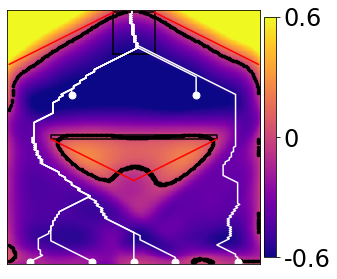

In [10]:
v = env.visualize_analytic_comparison(agent.Q_network, True, vmin=-.6, vmax=.6, nx=301, ny=301, labels=None, plotZero=True)
env.plot_reach_avoid_set()
env.plot_trajectories(agent.Q_network, T=200, states=env.visual_initial_states, toEnd=True)
#env.plot_trajectories(agent.Q_network, T=200, num_rnd_traj=100, toEnd=True, keepOutOf=True)
plt.tight_layout()
plt.savefig('figure/show/RA/{:s}/RA_{:s}.eps'.format(name_thickness, name_thickness))

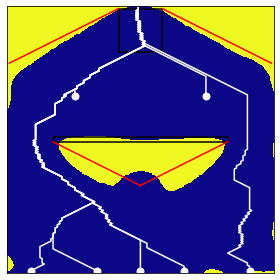

In [11]:
env.visualize_analytic_comparison(agent.Q_network, True, vmin=0, boolPlot=True, nx=301, ny=301, labels=None)
env.plot_reach_avoid_set()
env.plot_trajectories(agent.Q_network, T=200, states=env.visual_initial_states, toEnd=True)
plt.tight_layout()
plt.savefig('figure/show/RA/{:s}/RA_{:s}_bool.eps'.format(name_thickness, name_thickness))